<a href="https://colab.research.google.com/github/YousefSoltanian/MAE598_Design_Optimization/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inverted Double Pendulum On a Cart**
### **MAE 598, Design Optimization: Project 2 (MPC)**
### Seyed Yousef Soltanian
### Fall 2023


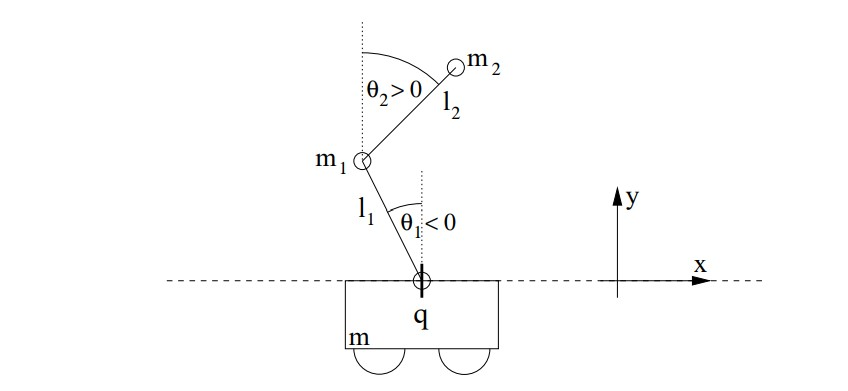



## System Description

Consider a double pendulum mounted on a cart, where the cart has mass $m$ and the pendulum has two rods with lengths $l_1$ and $l_2$. Point masses $m_1$ and $m_2$ are attached to the rods. The rods are assumed to be massless.

## Generalized Coordinates

Let $\theta_1$ and $\theta_2$ be the deviations of the rods from the upright position, and $q$ be the horizontal position of the cart. The system has three generalized coordinates: $q$, $\theta_1$, and $\theta_2$.

## Derivatives

The derivatives with respect to time are denoted as $\dot{q}$, $\dot{\theta}_1$, and $\dot{\theta}_2$.

## Control Input

The control input is denoted as $u(t)$, representing the force applied to the cart.

## External Disturbances

External disturbances $w_1$, $w_2$, $w_3$ act as forces on $q$, $\theta_1$, and $\theta_2$.

## Damping and Friction

Damping coefficients $d_1$, $d_2$, $d_3$ model friction and damping. The friction/damping force of the cart is $-d_1\dot{q}$, and the friction/damping forces in the joints are $-d_2\dot{\theta}_1$ and $-d_3\dot{\theta}_2$.

# System Dynamics

## Kinetic Energy K and Potential Energy P

The kinetic energy of the system is given by:
\begin{equation}
K = \frac{1}{2} \left[ m\dot{q}^2 + m_1(\dot{q} + l_1\dot{\theta}_1\cos\theta_1)^2 + m_2(\dot{q} + l_1\dot{\theta}_1\cos\theta_1 + l_2\dot{\theta}_2\cos\theta_2)^2 \right]
\end{equation}

The potential energy of the system is given by:

\begin{equation}
P = g \left[ m_1l_1\cos\theta_1 + m_2(l_1\cos\theta_1 + l_2\cos\theta_2) \right]
\end{equation}
## Lagrangian Mechanics

The Lagrangian $L$ is defined as the difference between kinetic and potential energy:

\begin{equation}
 L = K - P
\end{equation}

The equations of motion for the cart are derived using the principle of Lagrangian mechanics, resulting in the matrix equation:

\begin{equation}
 M(y)\ddot{y} = f(y, \dot{y}, u, \dot{w})
\end{equation}

where $M(y)$ is an invertible matrix.

## State-Space Equation

Defining the state vector $x = [q, \dot{q}, \theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2]$, the state-space equation is given by:

\begin{aligned}\begin{bmatrix} m + m_1 + m_2 & l_1(m_1 + m_2) \cos \theta_1 & m_2l_2 \cos \theta_2 \\ l_1(m_1 + m_2) \cos \theta_1 & l_1^2 (m_1 + m_2) & l_1 l_2 m_2 \cos (\theta_1 - \theta_2) \\ l_2 m_2 \cos \theta_2 & l_1 l_2 m_2 \cos (\theta_1 - \theta_2) & l_2^2 m_2 \end{bmatrix}\begin{bmatrix} \ddot{q} \\ \ddot{\theta}_1 \\ \ddot{\theta}_2 \end{bmatrix}\end{aligned} =
\begin{aligned}
\begin{bmatrix}
l_1(m_1 + m_2)\dot{\theta}_1^2\sin \theta_1 + m_2l_2\dot{\theta}_2^2\sin \theta_2 \\
-l_1l_2m_2\dot{\theta}_2^2\sin(\theta_1 - \theta_2) + gl_1(m_1 + m_2)\sin \theta_1 \\
l_1l_2m_2\dot{\theta}_1^2\sin(\theta_1 - \theta_2) + g l_2 m_2 \sin \theta_2
\end{bmatrix}
-\begin{bmatrix} d_1 \dot{q} \\ d_2 \dot{\theta}_1 \\ d_3 \dot{\theta}_2 \end{bmatrix} + \begin{bmatrix} u \\ 0 \\ 0 \end{bmatrix} + \begin{bmatrix} w_1 \\ w_2 \\ w_3 \end{bmatrix}
\end{aligned}

This system of equations describes the motion of an inverted double pendulum on a cart subject to control input and external disturbances.

## Linearized Dynamic
First wh have to linearized the Matrix $M$:

\begin{aligned}M≈\begin{bmatrix} m + m_1 + m_2 & l_1(m_1 + m_2) & m_2l_2  \\ l_1(m_1 + m_2)  & l_1^2 (m_1 + m_2) & l_1 l_2 m_2  \\ l_2 m_2  & l_1 l_2 m_2 & l_2^2 m_2 \end{bmatrix}\end{aligned}

and for the right hand side and $f(s,u)$ we have:
\begin{aligned}f=\begin{bmatrix}
    u \\
    l_1g(m_1+m_2)\theta_1 \\
    m_2l_2g \theta_2
\end{bmatrix}\end{aligned}

As a result, matrices  $A$ and  $B$ can be calculated as follows: $A=M^{-1}N ,B=M^{-1}F$
 , where

\begin{aligned}M = \begin{bmatrix}
    1 & 0 & 0 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 & 0 \\
    0 & 0 & 0 & M+m_1+m_2 & l_1(m_1+m_2) & l_2m_2 \\
    0 & 0 & 0 & l_1(m_1+m_2) & l_1^2(m_1+m_2) & l_1l_2m_2 \\
    0 &  0 & 0 &l_2m_2 & l_1l_2m_2 & l_2^2m_2
\end{bmatrix}\end{aligned}

\begin{aligned}N = \begin{bmatrix}
    0 & 0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 \\
    0 & (m_1+m_2)l_1g & 0 & 0 & 0 & 0 \\
    0 &  0 & m_2l_2g & 0 & 0 & 0
\end{bmatrix}\end{aligned}

\begin{aligned} F = \begin{bmatrix}
    0 \\
    0 \\
    0 \\
    1 \\
    0 \\
    0
\end{bmatrix}\end{aligned}

\begin{aligned}
A = M^{-1}N,
B = M^{-1}F.
\end{aligned}

# The Cost Function

The primary objective of the control problem is to guide the double pendulum system from its initial stable equilibrium position, where $\theta_1 = \pi$ and $\theta_2 = \pi$, to a final unstable equilibrium position where $\theta_1 = 0$ and $\theta_2 = 0$. This requires the design of an effective control strategy to achieve this transition within a limited time duration $T$.

we will use an energy-based formulation for the objective. If we think of energy in terms of potential and kinetic energy it is clear that we want to maximize the potential energy (up-up position) and minimize the kinetic energy (stabilization). Basically we want to minimaze the Lagrangian of the system. This is due the fact that a simple LQR cost formulation will do poorly because all the $\theta_i = 2\pi n$ are the answers of this control proble

\begin{equation}
J = \sum_{t=0}^{T}(T(s_t)-P(s_t)) = \sum_{t=0}^{T}(\frac{1}{2} \left[ m\dot{q}^2 + m_1(\dot{q} + l_1\dot{\theta}_1\cos\theta_1)^2 + m_2(\dot{q} + l_1\dot{\theta}_1\cos\theta_1 + l_2\dot{\theta}_2\cos\theta_2)^2 \right]-g \left[ m_1l_1\cos\theta_1 + m_2(l_1\cos\theta_1 + l_2\cos\theta_2) \right])
\end{equation}

where:
- $\mathbf{s}_t$ is the vector of states at time $t$, defined as $\mathbf{s}_t = [q_t, \dot{q}_t, \theta_{1,t}, \dot{\theta}_{1,t}, \theta_{2,t}, \dot{\theta}_{2,t}]$.


In this formulation, the total cost for each epoch is the summation of the costs over the duration $T$. It is important to note that there is no terminal cost, emphasizing the focus on the intermediate states during the transition.

## Controller Objective

The ultimate goal of the controller design is to minimize the defined cost function, driving the system from the initial stable equilibrium to the desired unstable equilibrium position. The choice of the weighting the cost function a crucial role in influencing the behavior of the system, affecting stability, and determining the trade-off between minimizing state deviations and control effort.

The proposed energy-based cost formulation serves as a quantitative measure to guide the control strategy towards achieving the specified control objective within the given time frame.


# MPC

\begin{align*}
\text{Minimize:} \quad & J = \sum_{t=0}^{T}(T(s_t)-P(s_t)) \\
\text{Subject to:} \quad & \mathbf{x}_{t+1} = A \mathbf{x}_t + B u_t, \quad t = 0, 1, \ldots, T-1 \\
& u_{\min} \leq u_t \leq u_{\max}, \quad t = 0, 1, \ldots, T-1
\end{align*}


## Optimization Objective

The objective is to find the optimal control signal $\boldsymbol{u}$ that minimize the defined cost function, guiding the system from the initial stable equilibrium to the desired unstable equilibrium position within the given time duration $T$.

## Constraints

The equality constraints are imposed by the system dynamics equations, ensuring that the optimization respects the physical laws governing the motion of the double pendulum.




In [ ]:
import logging
import math
import random
import numpy as np
import time
import torch
import torch.nn as nn
from torch import optim
from torch.nn import utils
import matplotlib.pyplot as plt

!pip install ipywidgets
from ipywidgets import IntProgress
from IPython.display import display
from matplotlib import pyplot as plt, rc
from matplotlib.animation import FuncAnimation, PillowWriter
rc('animation', html='jshtml')
!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False)

logger = logging.getLogger(__name__)

In [ ]:
#calculating matrices A and B
def get_a_b(M, m1, m2, l1, l2):
    X = np.array([
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, M + m1 + m2, l1 * (m1 + m2), l2 * m2],
        [0, 0, 0, l1 * (m1 + m2), l1 ** 2 * (m1 + m2), l1 * l2 * m2],
        [0, 0, 0, l2 * m2, l1 * l2 * m2, l2 ** 2 * m2]
    ], dtype="float64")
    N = np.array([
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0],
        [0, (m1 + m2) * l1 * g, 0, 0, 0, 0],
        [0, 0, m2 * l2 * g, 0, 0, 0]
    ], dtype="float64")
    F = np.array([[0, 0, 0, 1, 0, 0]], dtype="float64").T
    X_inv = inv(X)
    A = X_inv @ N
    B = inv(X) @ F
    return A, B

In [ ]:
def mpc(x_0, T):
    x = cp.Variable((n_state, T + 1))
    u = cp.Variable((n_action, T))
    theta0 = x_0[4]
    A = np.array([[1, 0, dt, 0, 0],
                [0, 1, 0, dt, 0],
                [0, 0, 1, 0, 0],
                [0, 0, 0, 1, 0],
                [0, 0, 0, 0, 1]])
    B = np.array([[0, 0],
                [0, 0],
                [np.sin(theta0)*dt * BOOST_ACCEL, 0],
                [np.cos(theta0)*dt * BOOST_ACCEL, 0],
                [0, dt * OMEGA_RATE]])
    c = np.array([0,0,0,-GRAVITY_ACCEL_Y*dt,0])
    cost = 0
    constr = []
    for t in range(T):
        constr += [x[:, t + 1] == A @ x[:, t] + B @ u[:, t] + c,
                cp.abs(u[0, t]) <= 2,
                cp.abs(u[1, t]) <= 1,
                x[1, t] >= 0]
    # cost = cp.sum_squares(x[:, T])
    cost = 10 * cp.square(x[0, T]) + cp.sum_squares(x[:, T])

    # sums problem objectives and concatenates constraints.
    constr += [x[:, 0] == x_0]
    problem = cp.Problem(cp.Minimize(cost), constr)
    problem.solve()
    return x, u